In [ ]:
!pip install "jax<=0.3.16" "jaxlib<=0.3.16" -q

     |████████████████████████████████| 1.0 MB 17.8 MB/s 
     |████████████████████████████████| 72.0 MB 156 kB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from sklearn.model_selection import train_test_split

from skimage import io
from skimage.transform import resize
from skimage.feature import greycomatrix, greycoprops
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from google.colab import drive
import glob

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

import warnings
warnings.filterwarnings("ignore")

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def imagen(address):
    scale = 8
    img_width = int(1920/scale)
    img_height = int(1080/scale)
    rgb = io.imread(address)
    rgb_resized = resize(rgb, (img_height, img_width), anti_aliasing=True)   
    gray_resized = img_as_ubyte(rgb2gray(rgb_resized))
    return gray_resized

In [ ]:
list_agua = (glob.glob("/content/drive/Shareddrives/Redes neuronales/data/Agua/*.jpg"))
list_bosque = (glob.glob("/content/drive/Shareddrives/Redes neuronales/data/Bosque/*.jpg"))
list_ciudad = (glob.glob("/content/drive/Shareddrives/Redes neuronales/data/Ciudad/*.jpg"))
list_cultivo = (glob.glob("/content/drive/Shareddrives/Redes neuronales/data/Cultivo/*.jpg"))
list_desierto = (glob.glob("/content/drive/Shareddrives/Redes neuronales/data/Desierto/*.jpg"))
list_montana = (glob.glob("/content/drive/Shareddrives/Redes neuronales/data/Montana/*.jpg"))
list_total = [list_agua, list_bosque, list_ciudad, list_cultivo, list_desierto, list_montana]

In [ ]:
#   Load image
x  = []
y = []
for i in range(0, len(list_total)):
   for j in range(0, len(list_total[i])):
      x.append(imagen(list_total[i][j]))
      y.append(i)

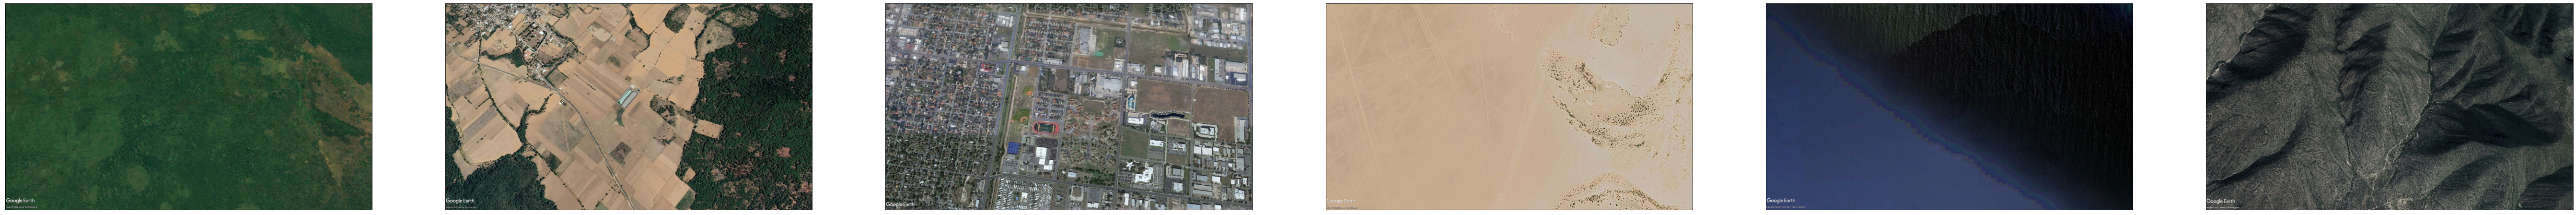

In [ ]:
# Display image, one of each class
n = 6
k=0
np.random.shuffle(list_total)
plt.figure(figsize=(96, 50))
for i in range(n):
  np.random.shuffle(list_total[k])
  ax = plt.subplot(3, n, i+1)
  image = mpimg.imread(list_total[k][i])
  plt.imshow(image)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  k += 1

Modelo CNN

In [ ]:
x.shape

(2016, 240, 135, 1)

In [ ]:
x = np.array(x)
x = x.reshape(x.shape[0], 240, 135, 1)
y = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(240, 135, 1)))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(256, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(256, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Dropout(0.05))
model.add(Conv2D(512, kernel_size=3, activation='relu', padding="same"))
model.add(MaxPool2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelo = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
51/51 [==============================] - 24s 93ms/step - loss: 3.2458 - accuracy: 0.2270 - val_loss: 1.6458 - val_accuracy: 0.4158
Epoch 2/50
51/51 [==============================] - 4s 83ms/step - loss: 1.5357 - accuracy: 0.3722 - val_loss: 1.4918 - val_accuracy: 0.4158
Epoch 3/50
51/51 [==============================] - 5s 89ms/step - loss: 1.4809 - accuracy: 0.4007 - val_loss: 1.2735 - val_accuracy: 0.5198
Epoch 4/50
51/51 [==============================] - 4s 83ms/step - loss: 1.2218 - accuracy: 0.5025 - val_loss: 1.1781 - val_accuracy: 0.4876
Epoch 5/50
51/51 [==============================] - 4s 83ms/step - loss: 1.1732 - accuracy: 0.5081 - val_loss: 1.0733 - val_accuracy: 0.6139
Epoch 6/50
51/51 [==============================] - 4s 83ms/step - loss: 1.0800 - accuracy: 0.5627 - val_loss: 1.0249 - val_accuracy: 0.6064
Epoch 7/50
51/51 [==============================] - 4s 84ms/step - loss: 1.0411 - accuracy: 0.5943 - val_loss: 1.1125 - val_accuracy: 0.5693
Epoch 8/50
5

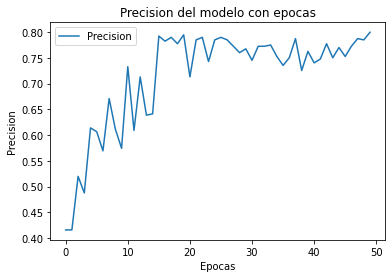

In [ ]:
plt.plot(modelo.history['val_accuracy'])
plt.title("Precision del modelo con epocas")
plt.ylabel("Precision")
plt.xlabel("Epocas")
plt.legend(["Precision"])
plt.show()